
**Explore Env**
- play the new environment - check consistency with Javascript version. 
- Add reward structure into the MDP
- Might have to adjust the number of time-steps

**solve using DQN**
- Make sure the observation space is the same
- Make sure the replay buffer is working as expected 
- Do we need 4 frames? Check paper and EnvWrappers. 
- wrap my env so it saves videos. 


In [1]:
import sys
sys.path.append('../dqn/')

In [2]:
from gym import wrappers
from atari_wrappers import *
import random
import os.path as osp
import gym
import time
import sys
import imp
imp.reload(gym)
imp.reload(wrappers)

<module 'gym.wrappers' from '/Users/chris/anaconda/envs/env_class_deepRL/lib/python3.5/site-packages/gym/wrappers/__init__.py'>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring Pong's Observations etc. 

In [4]:
def get_env(task, seed):
    env_id = task.env_id

    env = gym.make(env_id)

    set_global_seeds(seed)
    env.seed(seed)

    expt_dir = 'atari_test2/'
    env = wrappers.Monitor(env, osp.join(expt_dir, "gym"), force=True)
    env = wrap_deepmind(env)

    return env

In [5]:
def set_global_seeds(i):
    try:
        import tensorflow as tf
    except ImportError:
        pass
    else:
        tf.set_random_seed(i)
    np.random.seed(i)
    random.seed(i)

In [6]:
benchmark = gym.benchmark_spec('Atari40M')
task = benchmark.tasks[3]
print(task.max_timesteps)
seed=0
env = get_env(task, seed)


[2017-11-21 13:25:42,634] Making new env: PongNoFrameskip-v4


40000000


[2017-11-21 13:25:44,061] Clearing 6 monitor files from previous run (because force=True was provided)


In [7]:
obs = env.reset()
obs.shape

[2017-11-21 13:25:44,079] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/atari_test2/gym/openaigym.video.0.4762.video000000.mp4


(84, 84, 1)

In [8]:
for i in range(1000):
    obs, reward, done, info = env.step(5)
    env.render()
    if done:
        obs = env.reset() # this is when it saves a video *** otherwise I can't open it

env.render(close=True)

[2017-11-21 13:25:58,434] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/atari_test2/gym/openaigym.video.0.4762.video000001.mp4


In [12]:
np.linspace(0,240,5)

array([   0.,   60.,  120.,  180.,  240.])

- raw observations from the environment are 210,160,3
- they reshape to be 84 x 84 x 1 by wrapping the env
- this is about 7 times the size of ours 39*25
- they save a video every episode (but it might skip)

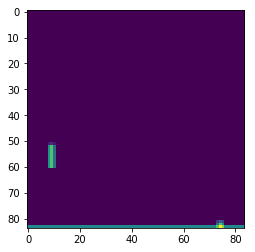

In [9]:
plt.imshow(obs[:,:,0])

In [10]:
from dqn_utils import *

In [94]:
replay_buffer = ReplayBuffer(10000, 4)

In [95]:
# i'll want to save out a movie or something from the replay buffer

In [96]:
last_obs = env.reset()
for t in range(10000):
    idx = replay_buffer.store_frame(last_obs)
    recent_history= replay_buffer.encode_recent_observation()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    replay_buffer.store_effect(idx,action,reward,done)
    if done:
        obs = env.reset()
    last_obs = obs.copy()

[2017-11-21 10:52:10,009] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/atari_test/gym/openaigym.video.1.3730.video000001.mp4
[2017-11-21 10:52:19,856] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/atari_test/gym/openaigym.video.1.3730.video000008.mp4


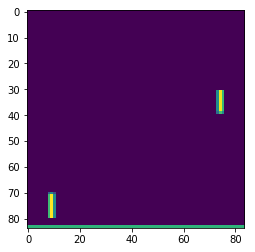

In [99]:
plt.imshow(last_obs[:,:,0])

In [101]:
replay_buffer.obs.shape


(10000, 84, 84, 1)

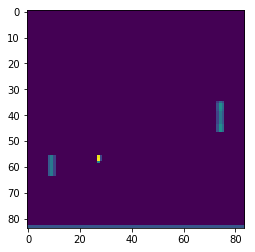

In [102]:
plt.imshow(replay_buffer.obs[10,:,:,0])

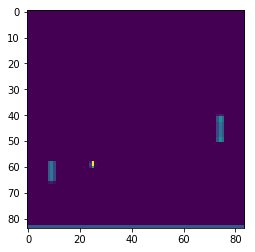

In [103]:
plt.imshow(replay_buffer.obs[11,:,:,0])

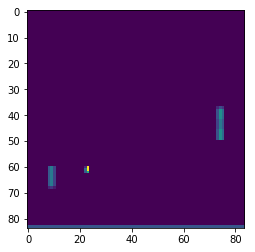

In [104]:
plt.imshow(replay_buffer.obs[12,:,:,0])

In [105]:
batch_size=32
obs_t_batch, act_t_batch, rew_batch, obs_tp1_batch, done_mask = replay_buffer.sample(batch_size)


In [106]:
obs_t_batch.shape

(32, 84, 84, 4)

In [107]:
act_t_batch

array([5, 1, 0, 4, 2, 4, 1, 3, 5, 2, 0, 1, 5, 3, 4, 0, 0, 1, 2, 0, 1, 4, 5,
       2, 3, 0, 1, 2, 3, 5, 3, 1], dtype=int32)

In [109]:
obs_tp1_batch.shape

(32, 84, 84, 4)

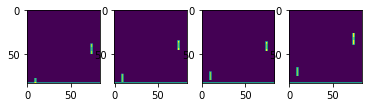

In [111]:
fig,axes = plt.subplots(1,4)
for i in range(4):
    axes[i].imshow(obs_t_batch[12,:,:,i])

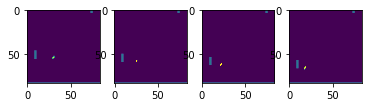

In [112]:
fig,axes = plt.subplots(1,4)
for i in range(4):
    axes[i].imshow(obs_t_batch[13,:,:,i])

In [116]:
#obs_t_batch[13,:,:,i]

# Exploring CQ

In [21]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes

<module 'crystal_quest_env' from '../crystal_quest/crystal_quest_env.py'>

In [22]:
env = cq.Wave1Env()

792
(975, 2)


In [23]:
print(env.observation_space)
print(env.action_space)

Box(39, 25, 1)
Discrete(5)


In [24]:
type(env.observation_space)

gym.spaces.box.Box

In [25]:
type(env.observation_space) == gym.spaces.Box

True

In [26]:
obs = env.reset()
env.ship_location

array([0, 0])

In [27]:
type(env.action_space)      == gym.spaces.Discrete

True

In [28]:
# how long is 15 seconds? 
import numpy as np
data = np.load('../data/tester013/testgrid.npy')
print('number of time-steps '+str(data.shape[2]))
print('number of time points per second '+str(data.shape[2]/60))

# he moves 1 grid every 100ms (2 pixels every 10 ms with a 20pixel grid size), 
# so yeah there should be 10 time-steps per second


number of time-steps 592
number of time points per second 9.866666666666667


In [29]:
# randomly sampling actions and visualizing 
env = cq.Wave1Env()
obs = env.reset()
for i in range(1000):
    #time.sleep(0.1)
    obs,r,done,info = env.step(env.action_space.sample())
    env.render()
env.render(close=True)

792
(975, 2)


In [30]:
#env.crystal_locations

In [31]:
#obs = np.zeros((env.grid_size[0],env.grid_size[1],4))
#CRYSTAL =np.array([0.0,1.0,0.0,0.0])
#obs[env.crystal_locations.astype(np.int)] = CRYSTAL
env._return_img().shape

(150, 234, 3)

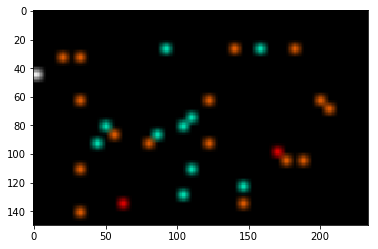

In [32]:
plt.imshow(env._return_img())

In [33]:
obs.shape

(39, 25, 1)

In [34]:
#obs[:,:,0]

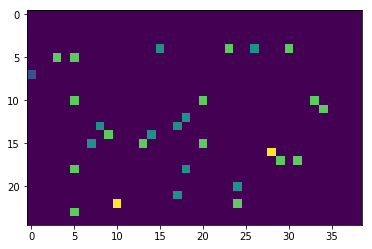

In [35]:
plt.imshow(obs[:,:,0].T)

## Encoding the Obs in the Replay Buffer

In [36]:
replay_buffer = ReplayBuffer(10000, 4)

In [38]:
last_obs = env.reset()
for t in range(10000):
    idx = replay_buffer.store_frame(last_obs)
    recent_history= replay_buffer.encode_recent_observation()
    action = env.action_space.sample()
    obs, reward, done,info = env.step(action)
    replay_buffer.store_effect(idx,action,reward,done)
    if done:
        obs = env.reset()
    last_obs = obs.copy()

In [39]:
last_obs.shape

(39, 25, 1)

In [40]:
type(last_obs[0,0,0])

numpy.uint8

In [41]:
replay_buffer.obs.shape

(10000, 39, 25, 1)

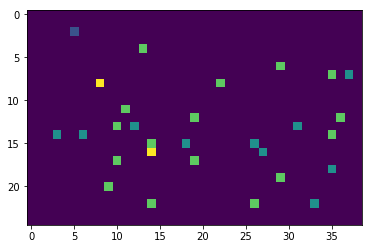

In [42]:
plt.imshow(replay_buffer.obs[1005,:,:,0].T)

In [43]:
batch_size=32
obs_t_batch, act_t_batch, rew_batch, obs_tp1_batch, done_mask = replay_buffer.sample(batch_size)


In [44]:
act_t_batch

array([4, 1, 1, 3, 4, 2, 4, 0, 2, 1, 1, 2, 2, 4, 4, 4, 0, 0, 2, 3, 0, 0, 4,
       4, 3, 2, 2, 1, 3, 2, 4, 2], dtype=int32)

- actions are int32 - k good. 

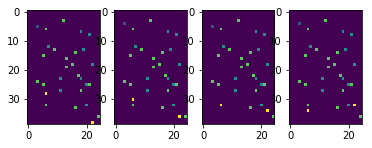

In [45]:
fig,axes = plt.subplots(1,4)
for i in range(4):
    axes[i].imshow(obs_t_batch[12,:,:,i])

- successive observations from replay buffer are not sequential. Breaks correlation structure. 

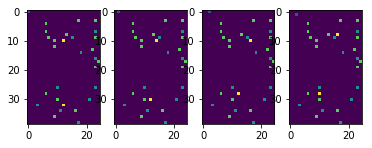

In [46]:
fig,axes = plt.subplots(1,4)
for i in range(4):
    axes[i].imshow(obs_t_batch[13,:,:,i])

- it works
- it didn't work when the observations were floats, because it got casted to int and made everything 0 or 1

## Monitoring the env? 
- is it possible to monitor the env? 


In [53]:
sys.path.append('../crystal_quest/')
import crystal_quest_env as cq
import imp 
imp.reload(cq) # reload after making changes

<module 'crystal_quest_env' from '../crystal_quest/crystal_quest_env.py'>

In [54]:
env = cq.Wave1Env()
expt_dir = 'cq_test/'
env = wrappers.Monitor(env, osp.join(expt_dir, "gym"), force=True)#,video_callable=False)
#env.enabled=False

[2017-11-21 13:27:53,850] Finished writing results. You can upload them to the scoreboard via gym.upload('/Users/chris/Desktop/irl_project/notebooks/cq_test/gym')
[2017-11-21 13:27:53,851] Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
[2017-11-21 13:27:53,852] Clearing 6 monitor files from previous run (because force=True was provided)


792
(975, 2)


In [55]:
obs = env.reset()


[2017-11-21 13:27:53,964] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/cq_test/gym/openaigym.video.2.4762.video000000.mp4


In [56]:
for i in range(5000):
    obs, reward, done, info = env.step(env.action_space.sample())
    env.render()
    if done:
        obs = env.reset() # this is when it saves a video *** otherwise I can't open it

env.render(close=True)

[2017-11-21 13:27:56,528] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/cq_test/gym/openaigym.video.2.4762.video000001.mp4
[2017-11-21 13:28:13,671] Starting new video recorder writing to /Users/chris/Desktop/irl_project/notebooks/cq_test/gym/openaigym.video.2.4762.video000008.mp4


In [57]:
env.get_episode_rewards()

[-790.0, -290.0, -380.0, -500.0, -680.0, -800.0, -170.0, -380.0]

In [58]:
env.get_episode_lengths()

[601, 601, 601, 601, 601, 601, 601, 601]

In [71]:
len(env.get_episode_lengths())

8

In [59]:
env.get_total_steps()

5000

In [60]:
env.stats_recorder

In [61]:
env.directory

'/Users/chris/Desktop/irl_project/notebooks/cq_test/gym'

In [62]:
def capped_cubic_video_schedule(episode_id):
    if episode_id < 1000:
        return int(round(episode_id ** (1. / 3))) ** 3 == episode_id
    else:
        return episode_id % 1000 == 0

False